In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Advertisement.csv')
df.head()

,SI No.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
del df['SI No.']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
TV           15 non-null float64
Radio        15 non-null float64
Newspaper    15 non-null float64
Sales        15 non-null float64
dtypes: float64(4)
memory usage: 560.0 bytes


C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


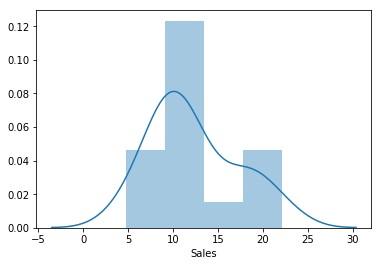

In [5]:
import seaborn as sns
sns.distplot(df.Sales)

['TV', 'Radio', 'Newspaper', 'Sales']


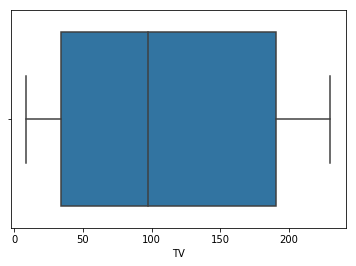

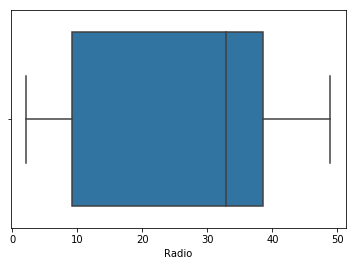

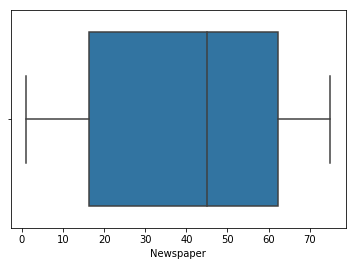

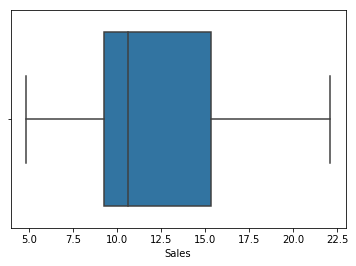

In [225]:
col = list(df.columns)
print(col)

for i in col:
    ax=sns.boxplot(x=i, data=df)
    plt.show()

## Linear Regression model - Univariate
A simple linear regression model is given by 'Y=mX+b'
where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable.
Linear Regression is a class of techniques for fitting a straight line to a set of data points.

In [183]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

## (1) TV and Sales

In [196]:
#Linear Regression
X = df.TV #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X,Y)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq= ', np.round(lm.score(X,Y),2))

Intercept,b: [6.98]
coefficient,m: [[0.05]]
Rsq=  0.69


In [197]:
#Stats model
lms = smf.ols(formula='Sales ~ TV', data=df).fit()
# print the coefficients
print(np.round(lms.params,2))
print('Rsq= ',np.round(lms.rsquared,2))

Intercept    6.98
TV           0.05
dtype: float64
Rsq=  0.69


## Sales = 0.05 (TV)  + 6.98
Simple linear regression equation (y=mx+b)

## (2) Radio and Sales

In [200]:
#Linear Regression
X = df.Radio #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X,Y)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq= ', np.round(lm.score(X,Y),2))

Intercept,b: [10.]
coefficient,m: [[0.09]]
Rsq=  0.09


In [201]:
#Stats model
lms = smf.ols(formula='Sales ~ Radio', data=df).fit()
# print the coefficients
print(np.round(lms.params,2))
print('Rsq= ',np.round(lms.rsquared,2))

Intercept    10.00
Radio         0.09
dtype: float64
Rsq=  0.09


## Sales = 0.09 (Radio)  + 10
Simple linear regression equation (y=mx+b)

## (3) Newspaper and Sales

In [202]:
#Linear Regression
X = df.Newspaper #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X,Y)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq= ', np.round(lm.score(X,Y),2))

Intercept,b: [10.89]
coefficient,m: [[0.04]]
Rsq=  0.04


In [203]:
#Stats model
lms = smf.ols(formula='Sales ~ Newspaper', data=df).fit()
# print the coefficients
print(np.round(lms.params,2))
print('Rsq= ',np.round(lms.rsquared,2))

Intercept    10.89
Newspaper     0.04
dtype: float64
Rsq=  0.04


## Sales =   0.04 (Newspaper) + 10.89
Simple linear regression equation (y=mx+b)

## (4) Visualization of the goodness of fit

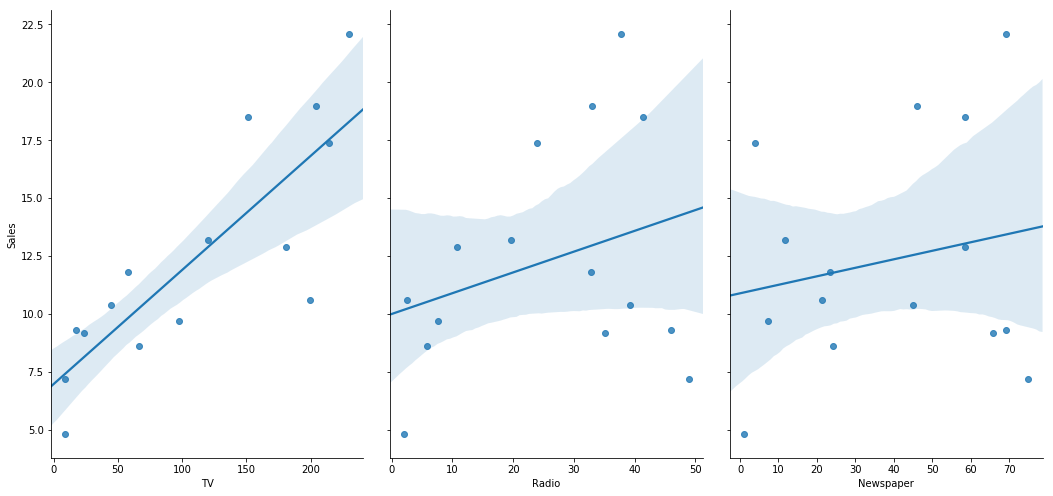

In [204]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Train & Test data set
Splitting the dataset into 80/20 ratio. 80% belongs to training and 20% belongs to test

In [260]:
#(1)TV and Sales
X1 = df.TV #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X1=np.array(X1).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
X1_train,X1_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X1_train,Y_train)
Y_pred = lm.predict(X1_test)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq (test score)= ', np.round(r2_score(Y_test, Y_pred),2))

Intercept,b: [7.14]
coefficient,m: [[0.04]]
Rsq (test score)=  0.38


## Sales = 0.04 (TV)  + 7.14
Simple linear regression equation (y=mx+b)

Text(0,0.5,'Predicted Sales')

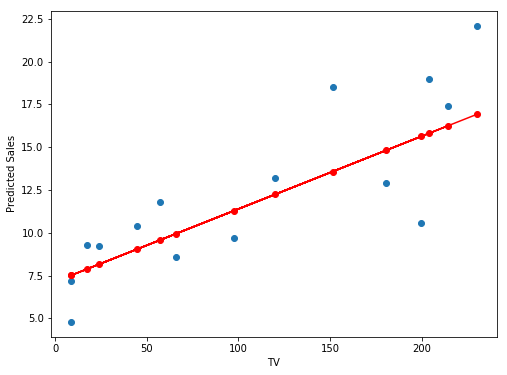

In [266]:
#Visualization
x = X1_test.flatten()
m,b = np.polyfit(x, Y_pred, 1) 
x= X1.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X1,Y)
plt.plot(x, m*x+b, c= 'r', marker='o')
plt.xlabel('TV')
plt.ylabel('Predicted Sales')

In [292]:
#(2)Radio and Sales
X2 = df.Radio #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X2=np.array(X2).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
X2_train,X2_test,Y_train,Y_test=train_test_split(X2,Y,test_size=0.2)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X2_train,Y_train)
Y_pred = lm.predict(X2_test)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq (test score)= ', np.round(r2_score(Y_test, Y_pred),2))

Intercept,b: [10.46]
coefficient,m: [[0.07]]
Rsq (test score)=  0.24


## Sales = 0.07 (Radio)  + 10.46
Simple linear regression equation (y=mx+b)

Text(0,0.5,'Predicted Sales')

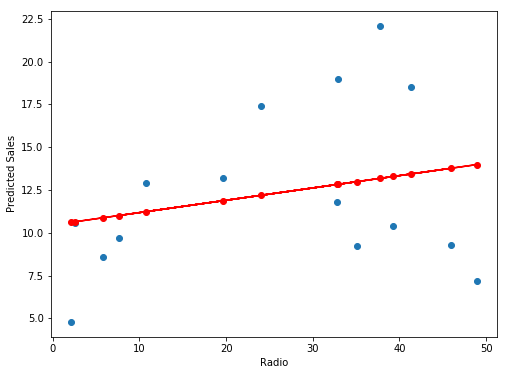

In [293]:
#Visualization
x = X2_test.flatten()
m,b = np.polyfit(x, Y_pred, 1) 
x= X2.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X2,Y)
plt.plot(x, m*x+b, c= 'r', marker='o')
plt.xlabel('Radio')
plt.ylabel('Predicted Sales')

In [310]:
#(3)Newspaper and Sales
X3 = df.Newspaper #Predictor (independant(s))
Y = df.Sales #Response (dependant)
X3=np.array(X3).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
X3_train,X3_test,Y_train,Y_test=train_test_split(X3,Y,test_size=0.2)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X3_train,Y_train)
Y_pred = lm.predict(X3_test)
#Intercepts or Slope & Coefficient
print('Intercept,b:',np.round(lm.intercept_,2))
print('coefficient,m:', np.round(lm.coef_,2))
print('Rsq (test score)= ', np.round(r2_score(Y_test, Y_pred),2))

Intercept,b: [11.47]
coefficient,m: [[0.03]]
Rsq (test score)=  -0.61


## Sales =   0.03 (Newspaper) + 11.47
Simple linear regression equation (y=mx+b)

Text(0,0.5,'Predicted Sales')

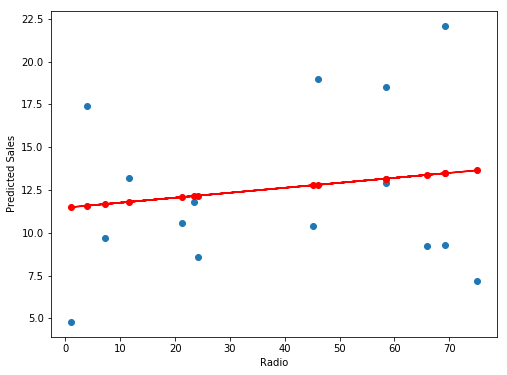

In [311]:
#Visualization
x = X3_test.flatten()
m,b = np.polyfit(x, Y_pred, 1) 
x= X3.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X3,Y)
plt.plot(x, m*x+b, c= 'r', marker='o')
plt.xlabel('Radio')
plt.ylabel('Predicted Sales')